In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1   # Airy pattern Bessel function


In [9]:
# Telescope physical parameters
wavelength = 550e-9        # 550 nm (green)
aperture_diameter = 0.15   # 15 cm telescope
focal_length = 1.2         # 1200 mm = 1.2 m

# Derived parameter
f_number = focal_length / aperture_diameter


In [10]:
def airy_pattern(r, wavelength, aperture):
    """
    Compute the radial Airy diffraction pattern intensity.
    Fully safe version: NO warnings.
    """
    k = 2 * np.pi / wavelength
    x = k * aperture * r

    intensity = np.zeros_like(x)

    # Handle x = 0 manually
    zero_mask = (x == 0)
    intensity[zero_mask] = 1.0

    # Handle x ≠ 0
    x_safe = x[~zero_mask]
    intensity[~zero_mask] = (2 * j1(x_safe) / x_safe)**2

    return intensity



In [11]:
r = np.linspace(0, 5e-5, 1000)  # radial range (up to 50 micrometers)
I = airy_pattern(r, wavelength, aperture_diameter)


In [12]:
# Angular Airy disk radius (in meters on focal plane)
airy_radius = 1.22 * wavelength * focal_length / aperture_diameter

# Convert to arcseconds
airy_radius_arcsec = (airy_radius / focal_length) * (180/np.pi) * 3600

# FWHM formula
fwhm_rad = 1.03 * wavelength / aperture_diameter
fwhm_arcsec = fwhm_rad * (180/np.pi) * 3600

print("===== Telescope Diffraction Parameters =====")
print(f"Airy Disk Radius      : {airy_radius*1e6:.3f} micrometers")
print(f"Airy Disk (arcsec)    : {airy_radius_arcsec:.3f} arcsec")
print(f"FWHM (arcsec)         : {fwhm_arcsec:.3f} arcsec")
print(f"F-number              : f/{f_number:.2f}")


===== Telescope Diffraction Parameters =====
Airy Disk Radius      : 5.368 micrometers
Airy Disk (arcsec)    : 0.923 arcsec
FWHM (arcsec)         : 0.779 arcsec
F-number              : f/8.00


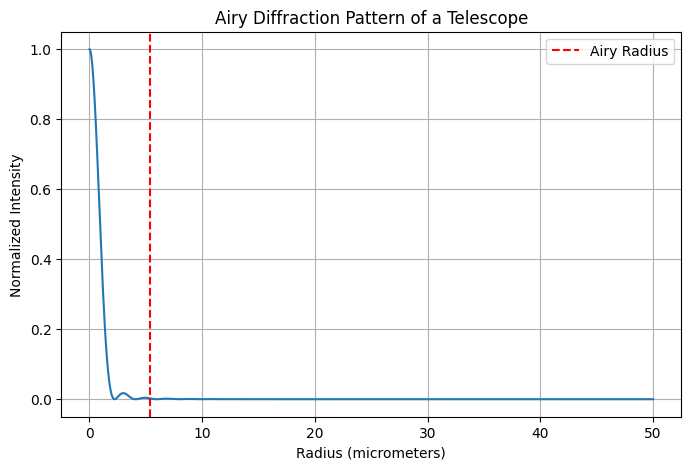

In [13]:
plt.figure(figsize=(8,5))
plt.plot(r * 1e6, I)
plt.axvline(airy_radius * 1e6, color='red', linestyle='--', label="Airy Radius")
plt.xlabel("Radius (micrometers)")
plt.ylabel("Normalized Intensity")
plt.title("Airy Diffraction Pattern of a Telescope")
plt.grid(True)
plt.legend()
plt.show()


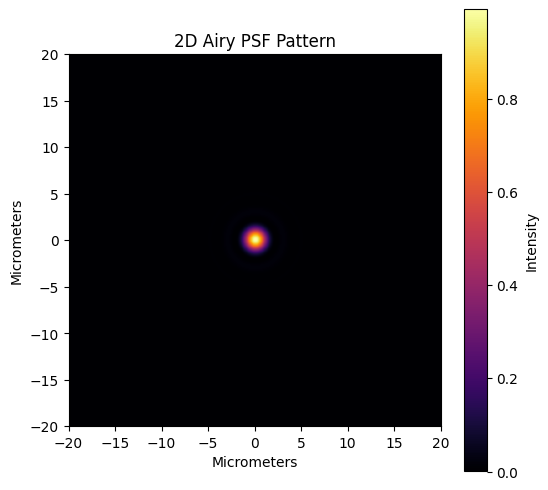

In [14]:
# Create 2D grid
N = 300
x = np.linspace(-2e-5, 2e-5, N)
y = np.linspace(-2e-5, 2e-5, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X*X + Y*Y)

PSF = airy_pattern(R, wavelength, aperture_diameter)

plt.figure(figsize=(6,6))
plt.imshow(PSF, cmap='inferno', extent=[-20,20,-20,20])
plt.colorbar(label="Intensity")
plt.title("2D Airy PSF Pattern")
plt.xlabel("Micrometers")
plt.ylabel("Micrometers")
plt.show()
